In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('../Data/Clean-data/clean.csv', parse_dates=['Date'])
data.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Temperature   421570 non-null  float64       
 5   Fuel_Price    421570 non-null  float64       
 6   MarkDown1     421570 non-null  float64       
 7   MarkDown2     421570 non-null  float64       
 8   MarkDown3     421570 non-null  float64       
 9   MarkDown4     421570 non-null  float64       
 10  MarkDown5     421570 non-null  float64       
 11  CPI           421570 non-null  float64       
 12  Unemployment  421570 non-null  float64       
 13  IsHoliday     421570 non-null  bool          
 14  Type          421570 non-null  object        
 15  Size          421

In [5]:
data.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375360,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328


Exploring Numerical Variables

In [6]:
data.select_dtypes(np.number)

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
0,1,1,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315
1,1,2,50605.27,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315
2,1,3,13740.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315
3,1,4,39954.04,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315
4,1,5,32229.38,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221
421566,45,94,5203.31,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221
421567,45,95,56017.47,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221
421568,45,97,6817.48,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221


In [7]:
data['Store'].nunique()

45

In [8]:
data['Dept'].nunique()

81

In [30]:
data['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
       93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65], dtype=int64)

In [9]:
store_dept_sales = pd.pivot_table(data, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_sales)

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


we can see that there are negative values and zeros
these values are wrong and needs to be dropped if they hold a small percentage of the the whole data set
which in ths case are 0.3%

In [11]:
data.loc[data['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
188,1,47,2010-02-19,-863.00,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,A,151315
406,1,47,2010-03-12,-698.00,57.79,2.667,0.00,0.00,0.00,0.00,0.00,211.380643,8.106,False,A,151315
2549,1,47,2010-10-08,-58.00,63.93,2.633,0.00,0.00,0.00,0.00,0.00,211.746754,7.838,False,A,151315
3632,1,54,2011-01-21,-50.00,44.04,3.016,0.00,0.00,0.00,0.00,0.00,211.827234,7.742,False,A,151315
4132,1,47,2011-03-11,0.00,53.56,3.459,0.00,0.00,0.00,0.00,0.00,214.111056,7.742,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,67.21,3.798,5370.39,0.00,361.22,1287.62,2461.81,191.002810,8.567,False,B,118221
420403,45,49,2012-06-29,-34.00,75.22,3.506,3291.36,425.60,0.00,314.88,2255.34,191.099246,8.567,False,B,118221
420736,45,49,2012-08-03,-1.91,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,False,B,118221
421007,45,54,2012-08-31,0.00,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,False,B,118221


In [12]:
data = data.loc[data['Weekly_Sales'] > 0]

In [13]:
data.shape

(420212, 16)

In [ ]:
# when dealing with NA's some sated will be deleted.
# dates can be set to be index

In [14]:
data['Date'].head()

0   2010-02-05
1   2010-02-05
2   2010-02-05
3   2010-02-05
4   2010-02-05
Name: Date, dtype: datetime64[ns]

In [15]:
data['Date'].tail()

421565   2012-10-26
421566   2012-10-26
421567   2012-10-26
421568   2012-10-26
421569   2012-10-26
Name: Date, dtype: datetime64[ns]

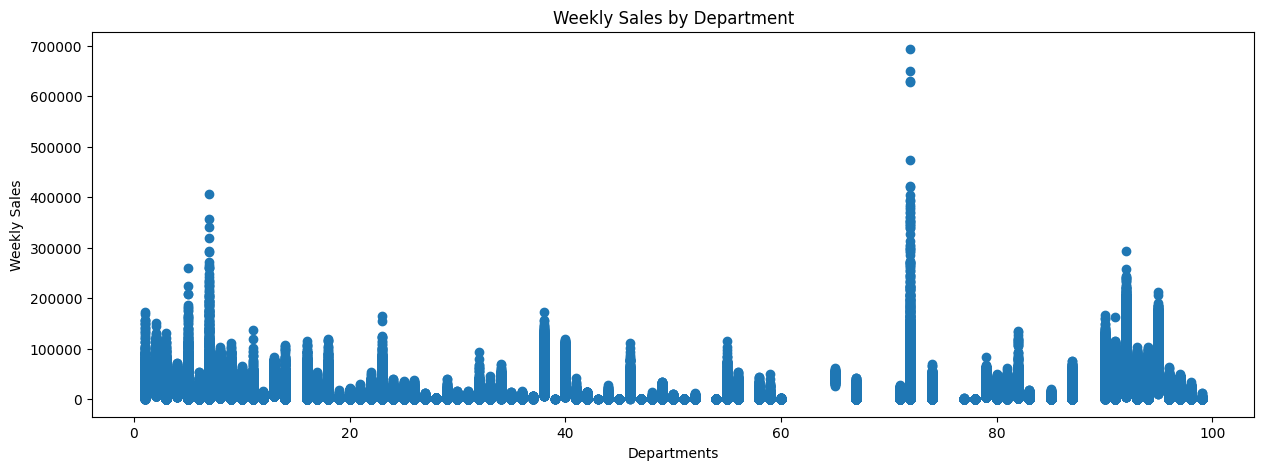

In [16]:
x = data['Dept']
y = data['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

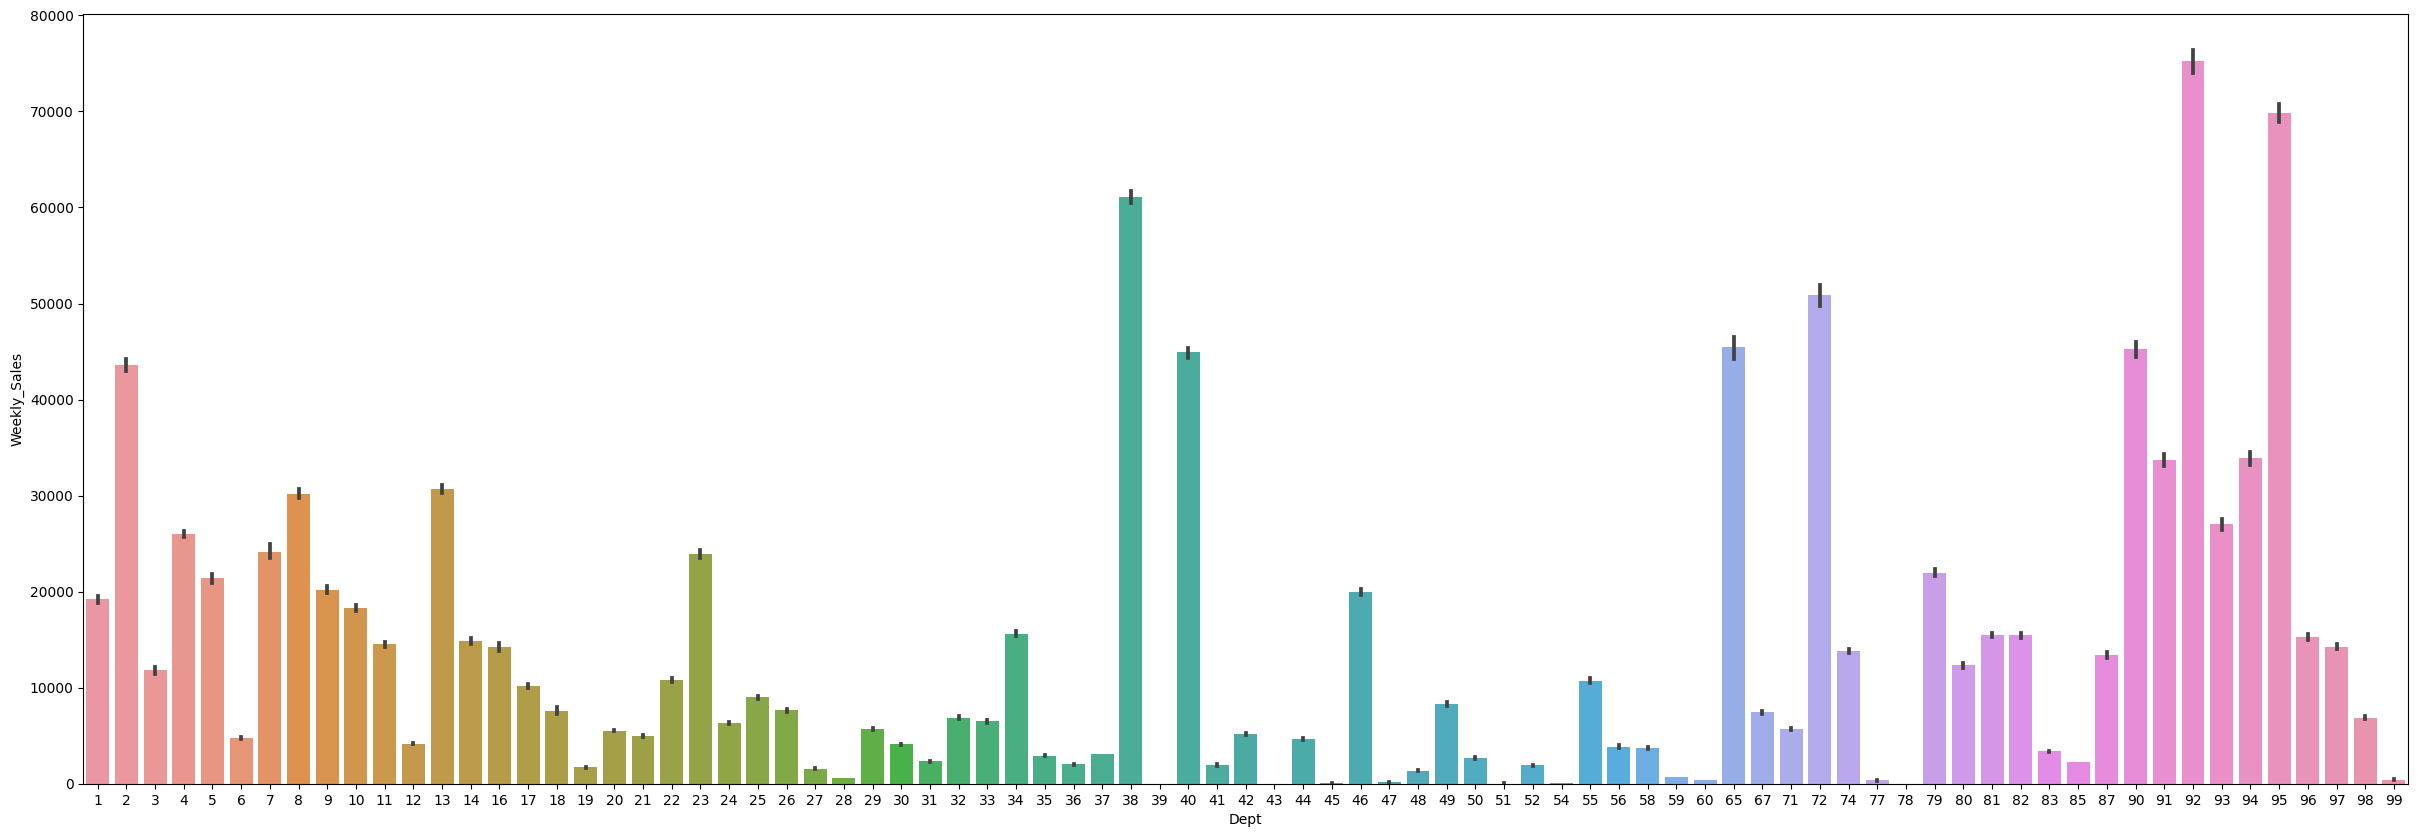

In [17]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=data)

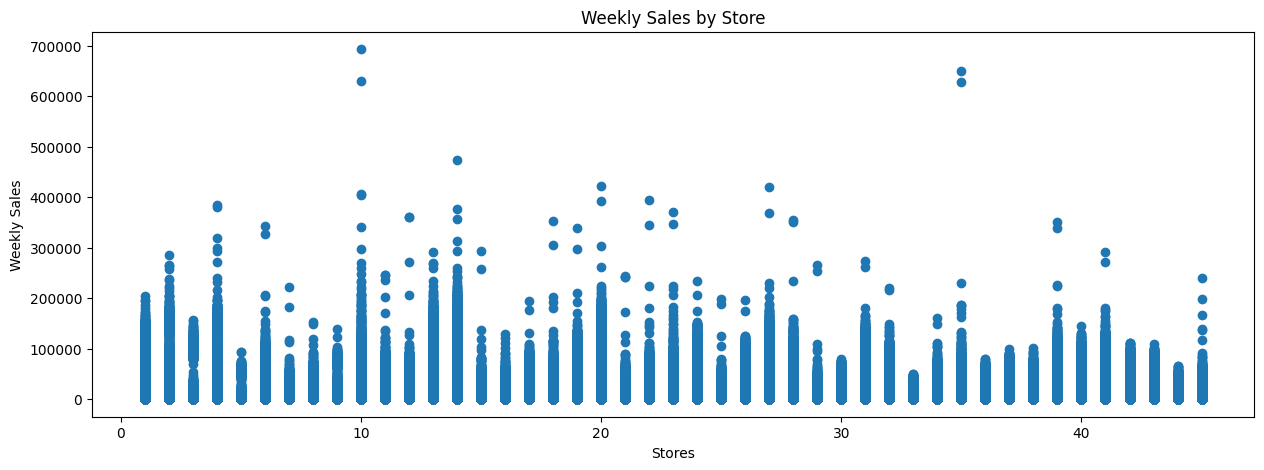

In [18]:
x = data['Store']
y = data['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

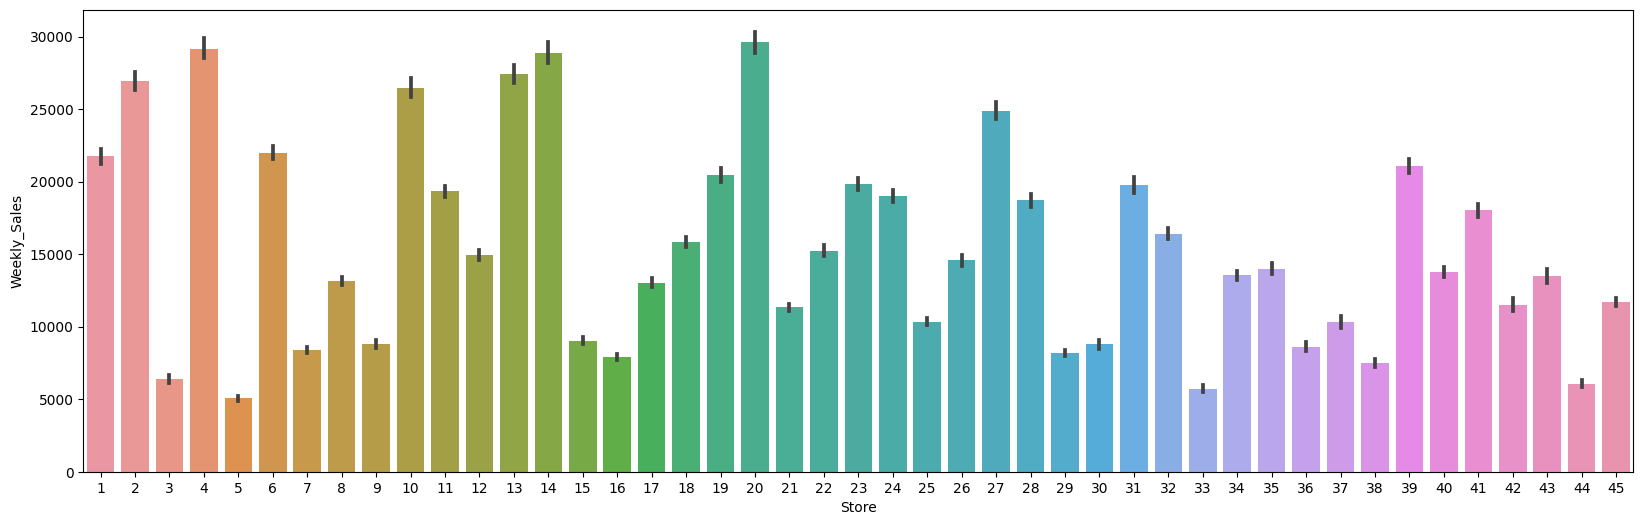

In [19]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=data)

<Axes: xlabel='Temperature'>

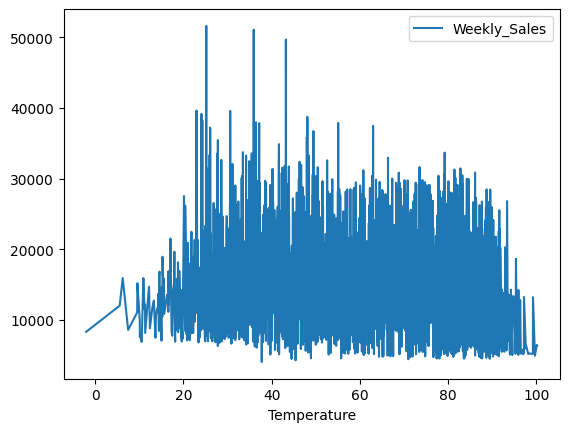

In [20]:
temp = pd.pivot_table(data, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<Axes: xlabel='Fuel_Price'>

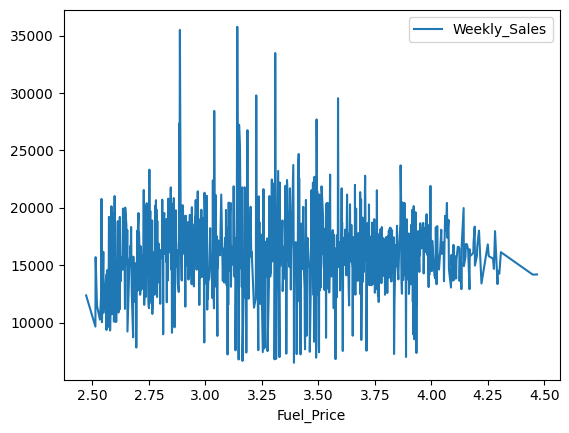

In [21]:
fuel_price = pd.pivot_table(data, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<Axes: xlabel='CPI'>

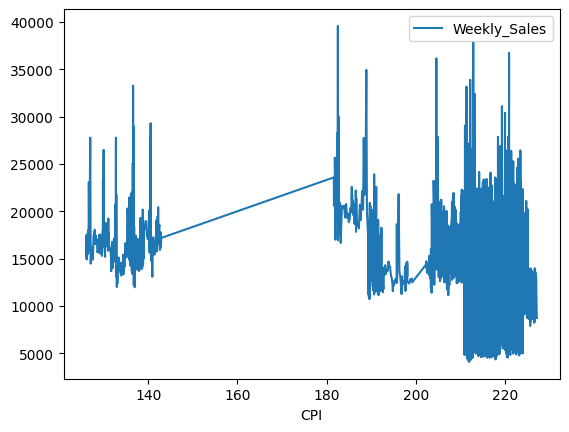

In [22]:
CPI = pd.pivot_table(data, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<Axes: xlabel='Unemployment'>

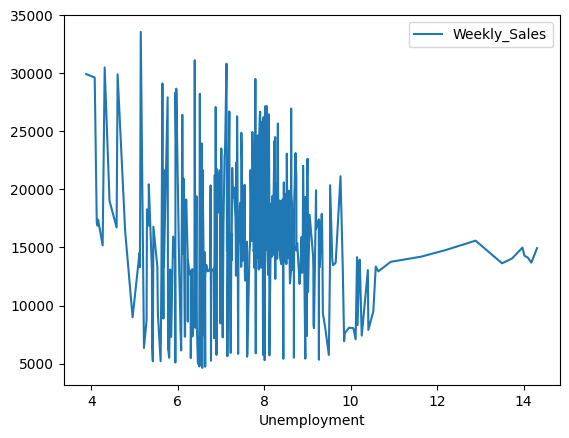

In [23]:
unemployment = pd.pivot_table(data, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

In [24]:
data.groupby('Type').describe()['Size'].round(2) 

,count,mean,min,25%,50%,75%,max,std
Type,,,,,,,,
A,214961.0,182225.39,39690.0,158114.0,202505.0,203819.0,219622.0,41532.66
B,162787.0,101796.84,34875.0,93188.0,114533.0,123737.0,140167.0,30944.31
C,42464.0,40536.10,39690.0,39690.0,39910.0,41062.0,42988.0,1194.69


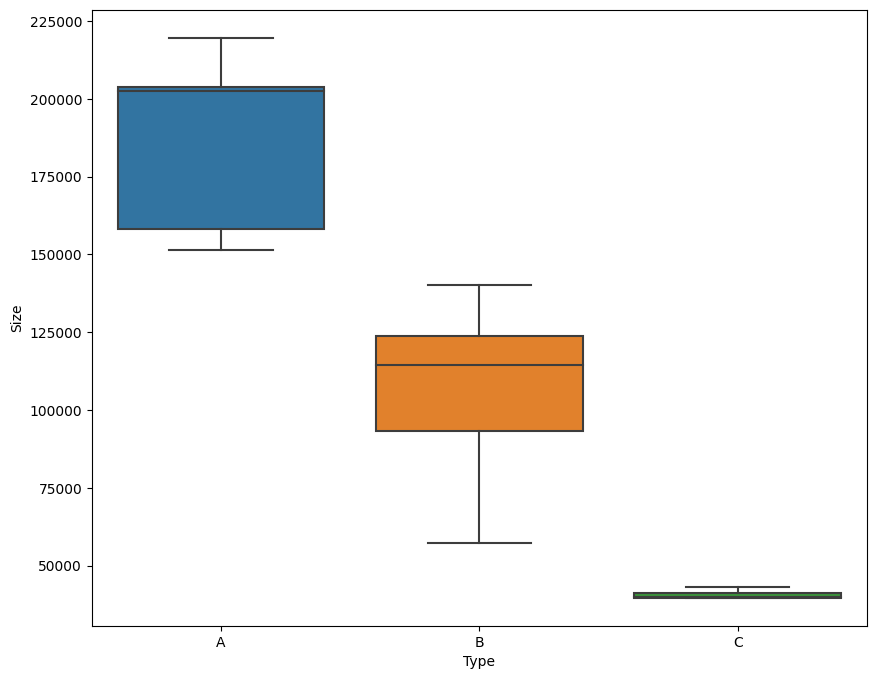

In [25]:
plt.figure(figsize=(10,8)) 
fig = sns.boxplot(x='Type', y='Size', data=data, showfliers=False)